# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | antofagasta
Processing Record 6 of Set 1 | kuwana
Processing Record 7 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | nadi
Processing Record 11 of Set 1 | castanos
Processing Record 12 of Set 1 | mahibadhoo
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | kalmunai
Processing Record 15 of Set 1 | timbuktu
Processing Record 16 of Set 1 | gadzhiyevo
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | tefe
Processing Record 21 of Set 1 | portal

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,283.87,95,0,0.96,AU,1707493672
1,edinburgh of the seven seas,-37.0676,-12.3116,292.87,89,92,11.42,SH,1707493652
2,waitangi,-43.9535,-176.5597,286.01,61,9,2.54,NZ,1707493663
3,antofagasta,-23.6500,-70.4000,296.75,66,29,4.19,CL,1707493918
4,kuwana,35.0667,136.7000,280.15,63,0,2.12,JP,1707493918


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,283.87,95,0,0.96,AU,1707493672
1,edinburgh of the seven seas,-37.0676,-12.3116,292.87,89,92,11.42,SH,1707493652
2,waitangi,-43.9535,-176.5597,286.01,61,9,2.54,NZ,1707493663
3,antofagasta,-23.6500,-70.4000,296.75,66,29,4.19,CL,1707493918
4,kuwana,35.0667,136.7000,280.15,63,0,2.12,JP,1707493918


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

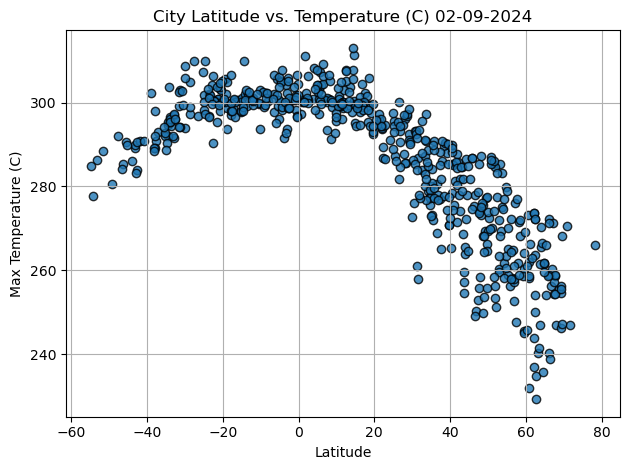

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature (C) {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

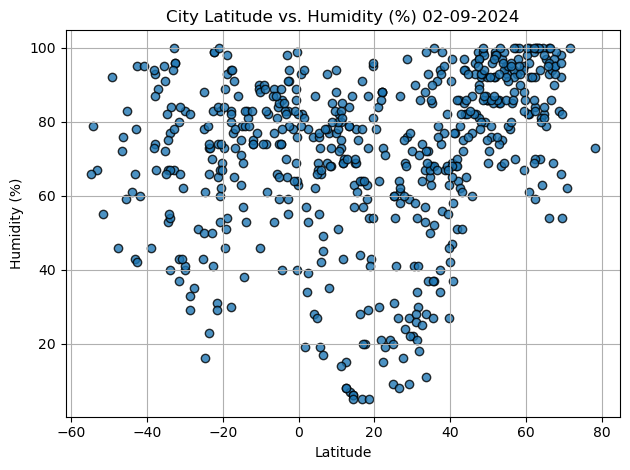

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

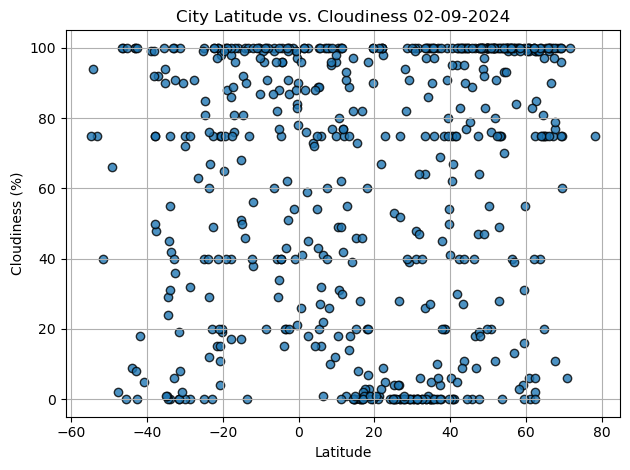

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

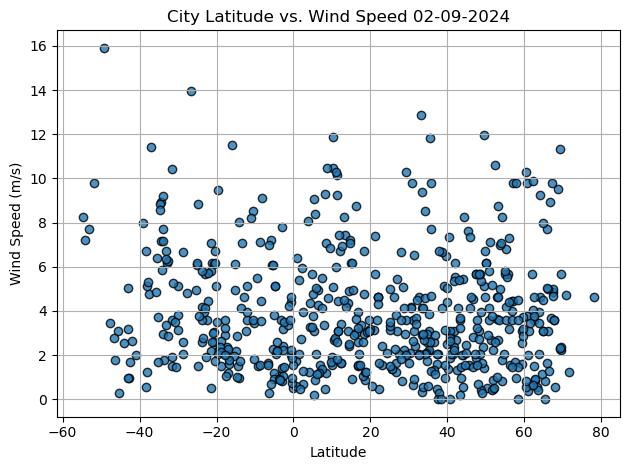

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
Date = time.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {Date}")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kuwana,35.0667,136.7000,280.15,63,0,2.12,JP,1707493918
8,castanos,26.7833,-101.4167,290.56,58,75,3.09,MX,1707493919
9,mahibadhoo,3.7833,72.9667,300.92,76,73,8.09,MV,1707493702
11,kalmunai,7.4167,81.8167,300.16,69,60,5.50,LK,1707493919
12,timbuktu,16.7735,-3.0074,304.34,5,82,2.58,ML,1707493919


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,283.87,95,0,0.96,AU,1707493672
1,edinburgh of the seven seas,-37.0676,-12.3116,292.87,89,92,11.42,SH,1707493652
2,waitangi,-43.9535,-176.5597,286.01,61,9,2.54,NZ,1707493663
3,antofagasta,-23.6500,-70.4000,296.75,66,29,4.19,CL,1707493918
5,adamstown,-25.0660,-130.1015,298.27,88,100,6.08,PN,1707493656


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8724337601257109
The r-squared value is 0.7611406658070865


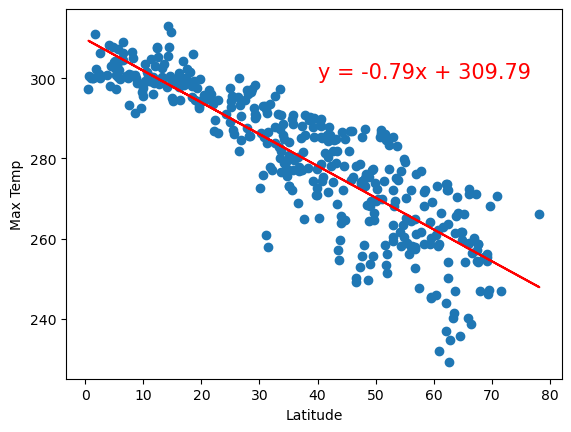

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is 0.628167027939358
The r-squared value is 0.39459381499016616


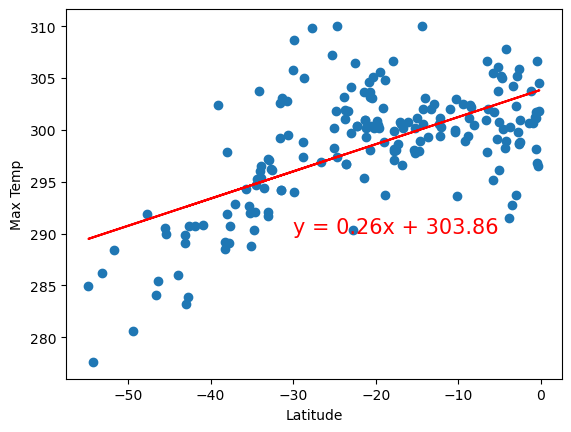

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,290),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:**
In the Northern Hemisphere, there is a strong, negative correlation between Latitude and Max Temp. Therefore, in the North, as Latitude increases and you move away from the equator, the temperature decreases. 
In the Southern Hemisphere, there is a strong, positive correlation between Latitude and Max Temperature. Therefore, in the South, as Latitude increases and you get closer to the equator, the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.47180088970464296
The r-squared value is 0.22259607952609267


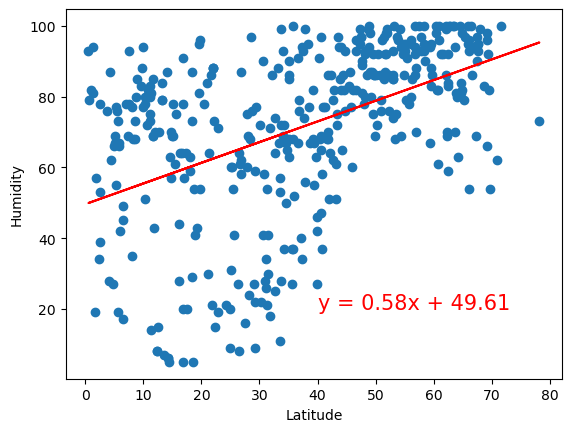

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is 0.15624164162550072
The r-squared value is 0.0244114505778314


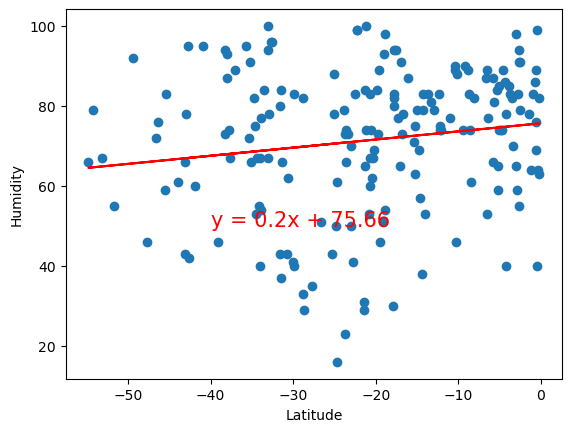

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a positive correlation between Latitude and Max Temp. Therefore, in the North, as Latitude increases and you get farther away from the equator, the humidity increases. 
In the Southern Hemisphere, there is a strong, positive correlation between Latitude and Max Temperature. Therefore, in the South, as Latitude increases and you get closer to the equator, the temperature increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2771176546485835
The r-squared value is 0.0767941945179316


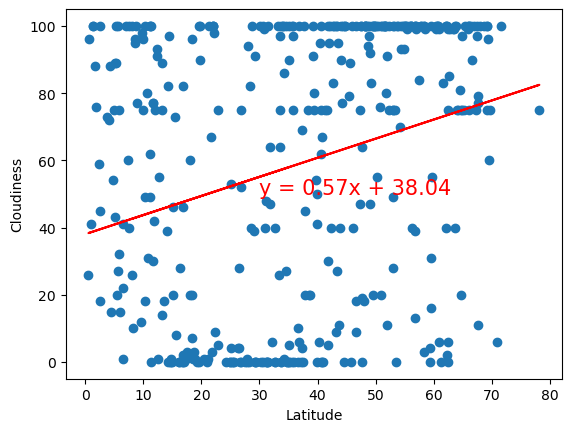

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is 0.21760146224334115
The r-squared value is 0.04735039637044022


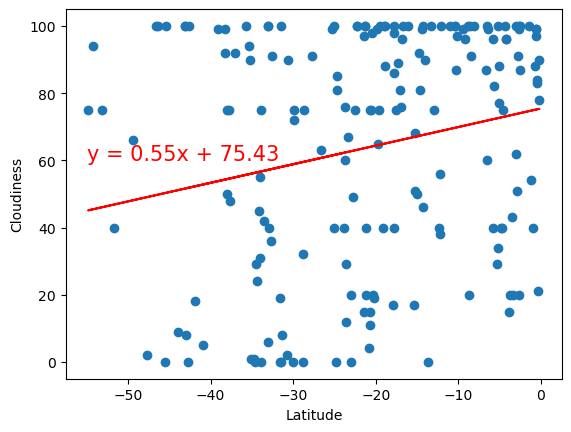

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a slightly positive correlation between Latitude and Cloudiness. Therefore, in the North, as Latitude increases and you get farther away from the equator, the cloudiness increases. 
In the Southern Hemisphere, there is a slightly positive correlation between Latitude and Cloudiness. Therefore, in the South, as Latitude increases and you get closer to the equator, the cloudiness increases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.013540470435986345
The r-squared value is 0.00018334433962782022


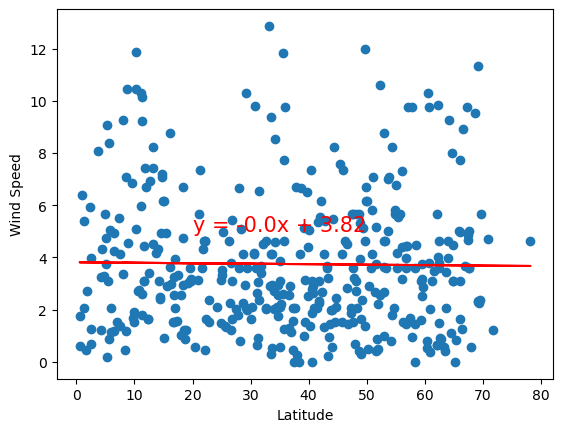

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

The r-value is -0.29554553007222595
The r-squared value is 0.08734716034567301


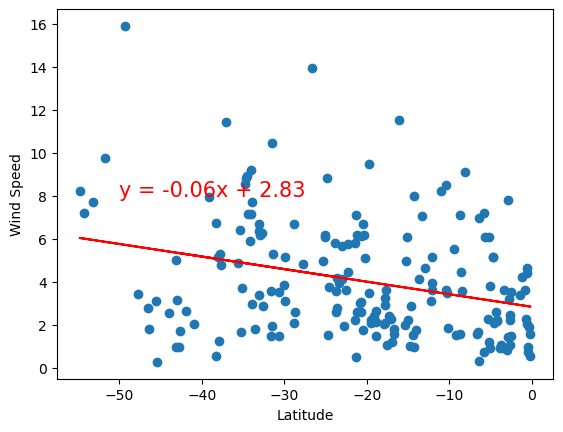

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue ** 2

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is {rvalue}")
print(f"The r-squared value is {r_squared}")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is practically a negligible, negative correlation between Latitude and Cloudiness. Therefore, in the North, there is almost no relationship between Latitude and Windspeed.
In the Southern Hemisphere, there is a slightly negative correlation between Latitude and Cloudiness. Therefore, in the South, as Latitude increases and you get closer to the equator, the wind speed decreases. 